## Clustering : Non-Scaled Data

In [1]:
#------------autoreloader
%load_ext autoreload
%autoreload 2

In [2]:
#----------setting up the path for the importer
import sys
sys.path.append('../')

In [3]:
#----------importing the important reusable function from src folder
from src.process_data.data import load_data, save_data, get_nan, get_info, get_shape
from src.unsupervised_ml.pca import get_corr, pca_and_variance, reduce_dim
from src.unsupervised_ml.clustering import find_k, kmeans_clutsers, find_eps, db_clusters, sample_for_hm, plot_dendo, hm_clusters, plot_price_and_labels

## ------------ Clustering ----------------

In [4]:
#-------------setting up the data path
df_non_scaled_train_path = '../data/model_ready/non-scaled/train_non_scaled.csv'
df_non_scaled_test_path = '../data/model_ready/non-scaled/test_non_scaled.csv'
df_non_scaled_price_path = '../data/model_ready/non-scaled/price_non_scaled.csv'

##### ************ Train data **************

In [5]:
#--------------loading them one by one and performing initial checks
df_non_scaled_train = load_data(df_non_scaled_train_path)
df_non_scaled_train.head()

,Source,Destination,Total_Stops,Airline_IndiGo,Airline_Jet Airways,Airline_other,Additional_Info_Some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_in_hours
0,2,2,0,1,0,0,0,24,3,22,20,1,10,2
1,1,1,2,0,0,0,0,1,5,5,50,13,15,7
2,0,0,2,0,1,0,0,9,6,9,25,4,25,19
3,1,1,1,1,0,0,0,12,5,18,5,23,30,5
4,2,2,1,1,0,0,0,1,3,16,50,21,35,4


In [6]:
#------nan values
get_nan(df_non_scaled_train)

Source                       0
Destination                  0
Total_Stops                  0
Airline_IndiGo               0
Airline_Jet Airways          0
Airline_other                0
Additional_Info_Some info    0
Date_of_Journey_day          0
Date_of_Journey_month        0
Dep_Time_hour                0
Dep_Time_minute              0
Arrival_Time_hour            0
Arrival_Time_minute          0
Duration_in_hours            0
dtype: int64

In [7]:
### veryfying the shape
get_shape(df_non_scaled_train)

(10683, 14)

In [8]:
#---------------finding the correlation between the features
get_corr(df_non_scaled_train)

,Source,Destination,Total_Stops,Airline_IndiGo,Airline_Jet Airways,Airline_other,Additional_Info_Some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_in_hours
Source,1.000000,1.000000,-0.599229,0.156271,-0.076331,-0.036383,-0.005165,-0.066328,-0.167061,0.035224,0.117531,-0.028373,0.148654,-0.434244
Destination,1.000000,1.000000,-0.599229,0.156271,-0.076331,-0.036383,-0.005165,-0.066328,-0.167061,0.035224,0.117531,-0.028373,0.148654,-0.434244
Total_Stops,-0.599229,-0.599229,1.000000,-0.304862,0.223627,-0.188354,0.024307,-0.008386,0.056309,-0.057593,-0.002617,0.036347,-0.106854,0.740397
Airline_IndiGo,0.156271,0.156271,-0.304862,1.000000,-0.366037,-0.306828,-0.256442,0.007322,-0.048515,-0.023367,-0.014763,-0.071459,0.035123,-0.346277
Airline_Jet Airways,-0.076331,-0.076331,0.223627,-0.366037,1.000000,-0.472109,0.498279,-0.017241,0.059716,0.113980,0.024376,-0.027332,-0.057698,0.307041
Airline_other,-0.036383,-0.036383,-0.188354,-0.306828,-0.472109,1.000000,-0.121509,0.038802,0.016525,-0.090298,0.024274,0.018699,-0.019540,-0.239570
Additional_Info_Some info,-0.005165,-0.005165,0.024307,-0.256442,0.498279,-0.121509,1.000000,0.036404,0.065390,0.048512,0.029454,-0.050649,-0.043024,0.112952
Date_of_Journey_day,-0.066328,-0.066328,-0.008386,0.007322,-0.017241,0.038802,0.036404,1.000000,-0.038378,0.002220,-0.008261,-0.003192,-0.017511,-0.022201
Date_of_Journey_month,-0.167061,-0.167061,0.056309,-0.048515,0.059716,0.016525,0.065390,-0.038378,1.000000,0.039112,-0.059238,-0.003941,-0.100626,0.016143
Dep_Time_hour,0.035224,0.035224,-0.057593,-0.023367,0.113980,-0.090298,0.048512,0.002220,0.039112,1.000000,-0.024806,0.005215,0.067909,0.002797


In [9]:
#-----------making the copy, and finding out the variance_ratio using the pca
df_non_scaled_train_copy = df_non_scaled_train.copy()
df_non_scaled_train_copy.head()

,Source,Destination,Total_Stops,Airline_IndiGo,Airline_Jet Airways,Airline_other,Additional_Info_Some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_in_hours
0,2,2,0,1,0,0,0,24,3,22,20,1,10,2
1,1,1,2,0,0,0,0,1,5,5,50,13,15,7
2,0,0,2,0,1,0,0,9,6,9,25,4,25,19
3,1,1,1,1,0,0,0,12,5,18,5,23,30,5
4,2,2,1,1,0,0,0,1,3,16,50,21,35,4


In [10]:
#------------------using the pca to get the explained variance ratio on copy data
pca_and_variance(df_non_scaled_train_copy)

array([0.41325736, 0.32117652, 0.08658263, 0.08253203, 0.05320895,
       0.03844319, 0.00237322, 0.00144443, 0.00037317, 0.0002726 ,
       0.00018413, 0.00011018, 0.00004159, 0.        ])

In [11]:
#-----------------using the pca to reduce the dimensionality n the original train data
df_non_scaled_train = reduce_dim(df_non_scaled_train)
df_non_scaled_train

array([[ -3.66105359, -13.36269985],
       [ 26.34996186,  -7.61959325],
       [  0.30936807,   0.50455273],
       ...,
       [ -4.04090086,  -4.65063037],
       [  6.7970357 , -13.62754849],
       [ 31.36378226,  -7.75623546]])

In [12]:
#--------------checking out the variance ratio of the reuduced data
pca_and_variance(df_non_scaled_train)

array([0.56268831, 0.43731169])

##### ============= Kmeans clustering ==================

[6698473.49080142, 3781378.293739815, 2469107.777733047, 1684825.844729899, 1389775.8159202223, 1191080.4925481426, 927903.4923210017, 778904.0598305351, 678278.3903598572, 690072.4645997488, 531791.4375191625]


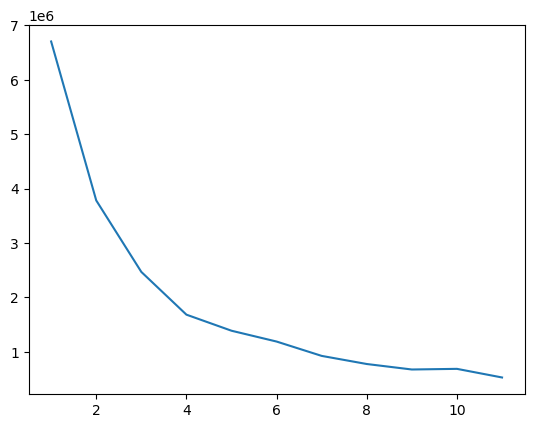

In [13]:
#---------finding the value of the k
find_k(df_non_scaled_train)

In [14]:
#----------setting up the labels path
y_labels_kmeans_path = '../../labels/non_scaled/non_scaled_kmeans_labels.npy'
y_labels_kmeans_path

'../../labels/non_scaled/non_scaled_kmeans_labels.npy'

0.4050742017602831


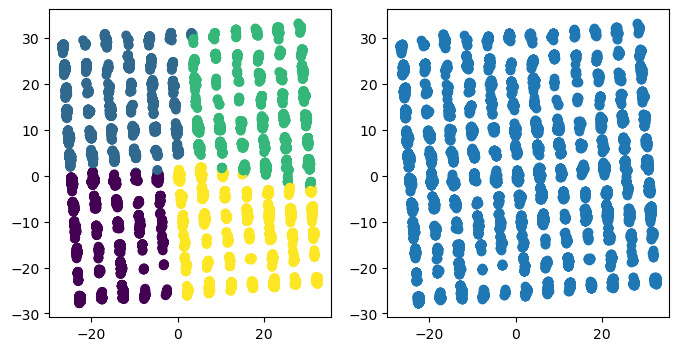

In [17]:
#-----------taking k = 4
kmeans_clutsers(df_non_scaled_train, k = 4, labels_path = y_labels_kmeans_path)

##### ================= DB scan clustering ===================

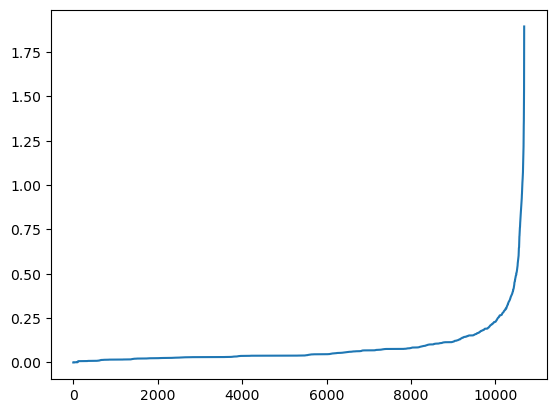

In [18]:
#---------------finding the value of eps
find_eps(df_non_scaled_train)

In [19]:
#----------setting up the labels path
y_labels_db_path = '../../labels/non_scaled/non_scaled_db_labels.npy'
y_labels_db_path

'../../labels/non_scaled/non_scaled_db_labels.npy'

0.5561251980754452


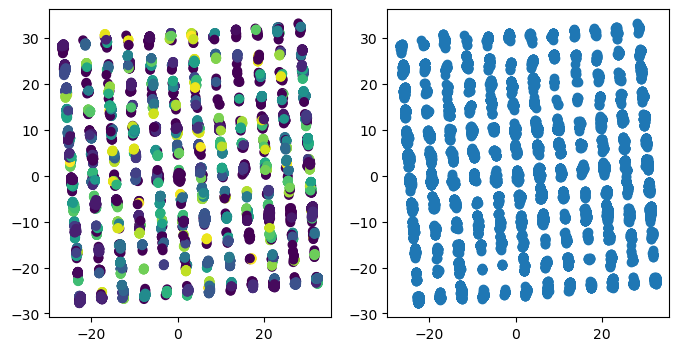

In [26]:
#-------------from the graph taking 0.18
db_clusters(df_non_scaled_train, eps = 0.18, labels_path = y_labels_db_path)

##### ================ HM clustering ====================

In [22]:
### For the hm clustering I will take the sample of 3000 records from the df_scaled_train
### it's because of lack of the resources

In [23]:
# -------------taking the sample
df_non_scaled_train_hm = sample_for_hm(df_non_scaled_train)
df_non_scaled_train_hm

array([[ -3.66105359, -13.36269985],
       [ 26.34996186,  -7.61959325],
       [  0.30936807,   0.50455273],
       ...,
       [ 31.39386087,  -8.14127941],
       [  3.17221528,  30.65301683],
       [  9.66498114,  11.07214346]])

In [24]:
#-------------checking the shape
get_shape(df_non_scaled_train_hm)

(3000, 2)

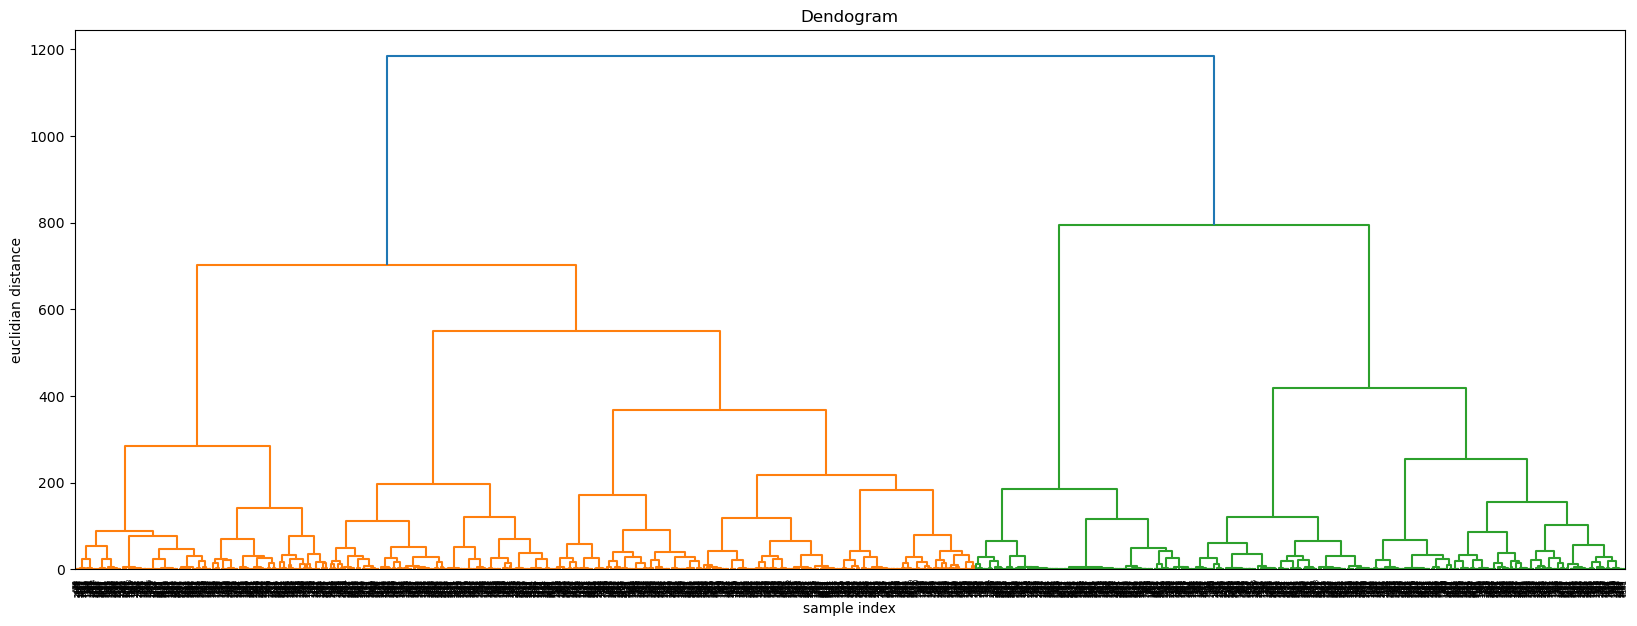

In [25]:
#---------------plotting the dendogram to find the value
plot_dendo(df_non_scaled_train_hm)

In [27]:
#----------setting up the labels path
y_labels_hm_path = '../../labels/non_scaled/non_scaled_hm_labels.npy'
y_labels_hm_path

'../../labels/non_scaled/non_scaled_hm_labels.npy'

0.3514392005171197


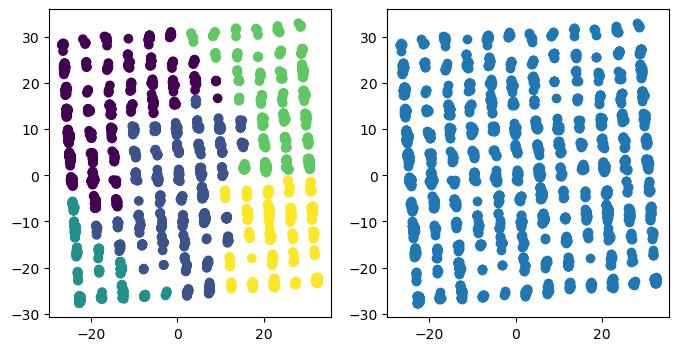

In [28]:
#-------------making the clusters on behalf of the values
hm_clusters(df_non_scaled_train_hm, n_clusters = 5, labels_path = y_labels_hm_path)

##### ********** Test Data ************

In [29]:
### loading the data
df_non_scaled_test = load_data(df_non_scaled_test_path)
df_non_scaled_test.head()

,Source,Destination,Total_Stops,Airline_IndiGo,Airline_Jet Airways,Airline_other,Additional_Info_Some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_in_hours
0,0,0,1,0,1,0,0,6,6,17,30,4,25,10
1,1,1,1,1,0,0,0,12,5,6,20,10,20,4
2,0,0,1,0,1,0,1,21,5,19,15,19,0,23
3,0,0,1,0,0,1,0,21,5,8,0,21,0,13
4,2,2,0,0,0,1,0,24,6,23,55,2,45,2


In [30]:
### checking the nan values
get_nan(df_non_scaled_test)

Source                       0
Destination                  0
Total_Stops                  0
Airline_IndiGo               0
Airline_Jet Airways          0
Airline_other                0
Additional_Info_Some info    0
Date_of_Journey_day          0
Date_of_Journey_month        0
Dep_Time_hour                0
Dep_Time_minute              0
Arrival_Time_hour            0
Arrival_Time_minute          0
Duration_in_hours            0
dtype: int64

In [31]:
### veryfying the shape
get_shape(df_non_scaled_test)

(2671, 14)

In [32]:
### finding the correlation
get_corr(df_non_scaled_test)

,Source,Destination,Total_Stops,Airline_IndiGo,Airline_Jet Airways,Airline_other,Additional_Info_Some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_in_hours
Source,1.000000,1.000000,-0.586767,0.100997,-0.036204,-0.040638,0.023250,-0.030094,-0.151245,0.085176,0.111308,-0.006206,0.166765,-0.420810
Destination,1.000000,1.000000,-0.586767,0.100997,-0.036204,-0.040638,0.023250,-0.030094,-0.151245,0.085176,0.111308,-0.006206,0.166765,-0.420810
Total_Stops,-0.586767,-0.586767,1.000000,-0.267581,0.195723,-0.211352,0.006695,-0.017088,0.022821,-0.103012,0.007892,0.032748,-0.119910,0.736601
Airline_IndiGo,0.100997,0.100997,-0.267581,1.000000,-0.345862,-0.324588,-0.240003,0.009340,-0.044828,-0.029029,-0.028656,-0.022180,0.026999,-0.324416
Airline_Jet Airways,-0.036204,-0.036204,0.195723,-0.345862,1.000000,-0.474535,0.504145,-0.008776,0.011203,0.134777,-0.010494,-0.009336,-0.059965,0.284718
Airline_other,-0.040638,-0.040638,-0.211352,-0.324588,-0.474535,1.000000,-0.137213,0.014464,0.051057,-0.066131,0.040340,-0.013662,-0.024725,-0.245360
Additional_Info_Some info,0.023250,0.023250,0.006695,-0.240003,0.504145,-0.137213,1.000000,0.028450,0.023572,0.075563,-0.001395,-0.032577,-0.028629,0.099735
Date_of_Journey_day,-0.030094,-0.030094,-0.017088,0.009340,-0.008776,0.014464,0.028450,1.000000,-0.023324,-0.023386,-0.010510,0.019613,-0.003485,-0.025508
Date_of_Journey_month,-0.151245,-0.151245,0.022821,-0.044828,0.011203,0.051057,0.023572,-0.023324,1.000000,0.015798,-0.109383,-0.000679,-0.148013,-0.016176
Dep_Time_hour,0.085176,0.085176,-0.103012,-0.029029,0.134777,-0.066131,0.075563,-0.023386,0.015798,1.000000,-0.034524,0.000147,0.066751,-0.019688


In [33]:
### making the copy and finding out the pca explained variance ratio
df_non_scaled_test_copy = df_non_scaled_test.copy()
df_non_scaled_test_copy.head()

,Source,Destination,Total_Stops,Airline_IndiGo,Airline_Jet Airways,Airline_other,Additional_Info_Some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_in_hours
0,0,0,1,0,1,0,0,6,6,17,30,4,25,10
1,1,1,1,1,0,0,0,12,5,6,20,10,20,4
2,0,0,1,0,1,0,1,21,5,19,15,19,0,23
3,0,0,1,0,0,1,0,21,5,8,0,21,0,13
4,2,2,0,0,0,1,0,24,6,23,55,2,45,2


In [34]:
### finding out the variance explained ratio by df_scaled_test_copy
pca_and_variance(df_non_scaled_test_copy)

array([0.41914592, 0.32464008, 0.08206206, 0.07751795, 0.05518097,
       0.03683925, 0.00223432, 0.0014234 , 0.00036199, 0.00027206,
       0.0001804 , 0.00010215, 0.00003946, 0.        ])

In [35]:
### reducing the dimensionality of the df_scaled_test data
df_non_scaled_test = reduce_dim(df_non_scaled_test)
df_non_scaled_test

array([[  4.77807982,   1.61253469],
       [ -4.58243091,  -4.53695172],
       [ -7.62137906, -26.14526578],
       ...,
       [ 24.6052906 ,   3.66368647],
       [-23.64474298, -12.42150464],
       [ 31.05312136,  -7.72145754]])

In [36]:
### veryfying the shape
get_shape(df_non_scaled_test)

(2671, 2)

In [37]:
### checking out the variance of the reduced data
pca_and_variance(df_non_scaled_test)

array([0.56353026, 0.43646974])

##### ============= K means clustering ==============

[1730000.2950228872, 965619.7694558566, 690646.3205015736, 420304.32363070117, 349642.96421470173, 283054.2768168804, 235844.6463533491, 215536.8387106585, 169050.22955787784, 170576.4012474225, 142355.42186179638]


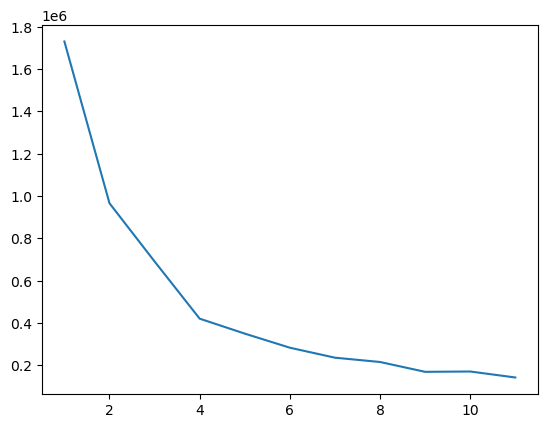

In [38]:
### finding the value of the k
find_k(df_non_scaled_test)

0.4165486209689131


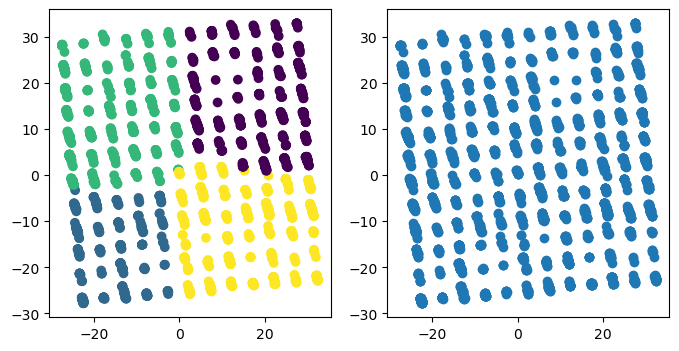

In [39]:
### taking k = 4
kmeans_clutsers(df_non_scaled_test, k = 4)

##### ============= DB scan clustering ==============

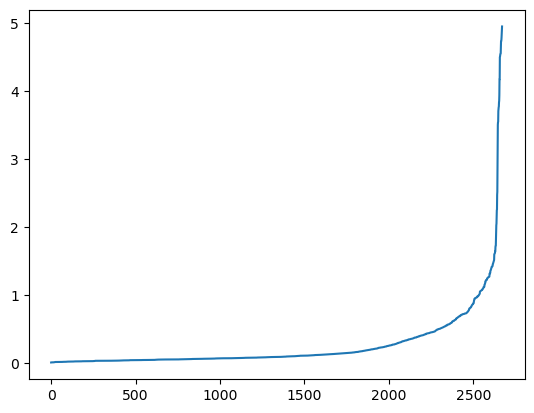

In [40]:
### finding the value of eps
find_eps(df_non_scaled_test)

0.7819955536790605


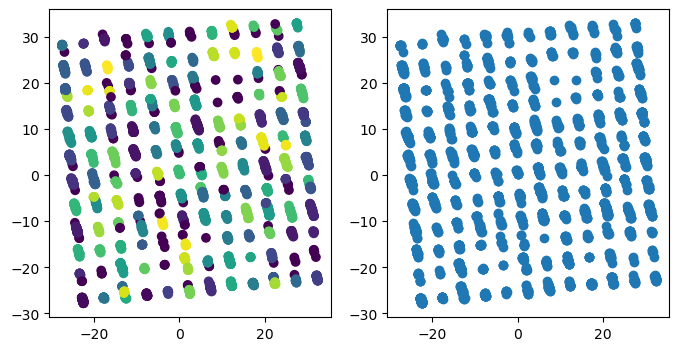

In [41]:
### taking eps = 0.80
db_clusters(df_non_scaled_test, eps = 0.80)

##### ============= HM clustering ================

In [38]:
### for the df_scaled_test, I will not take the sample in case of HM clustering
### because the shape of the data is already 2671 rows

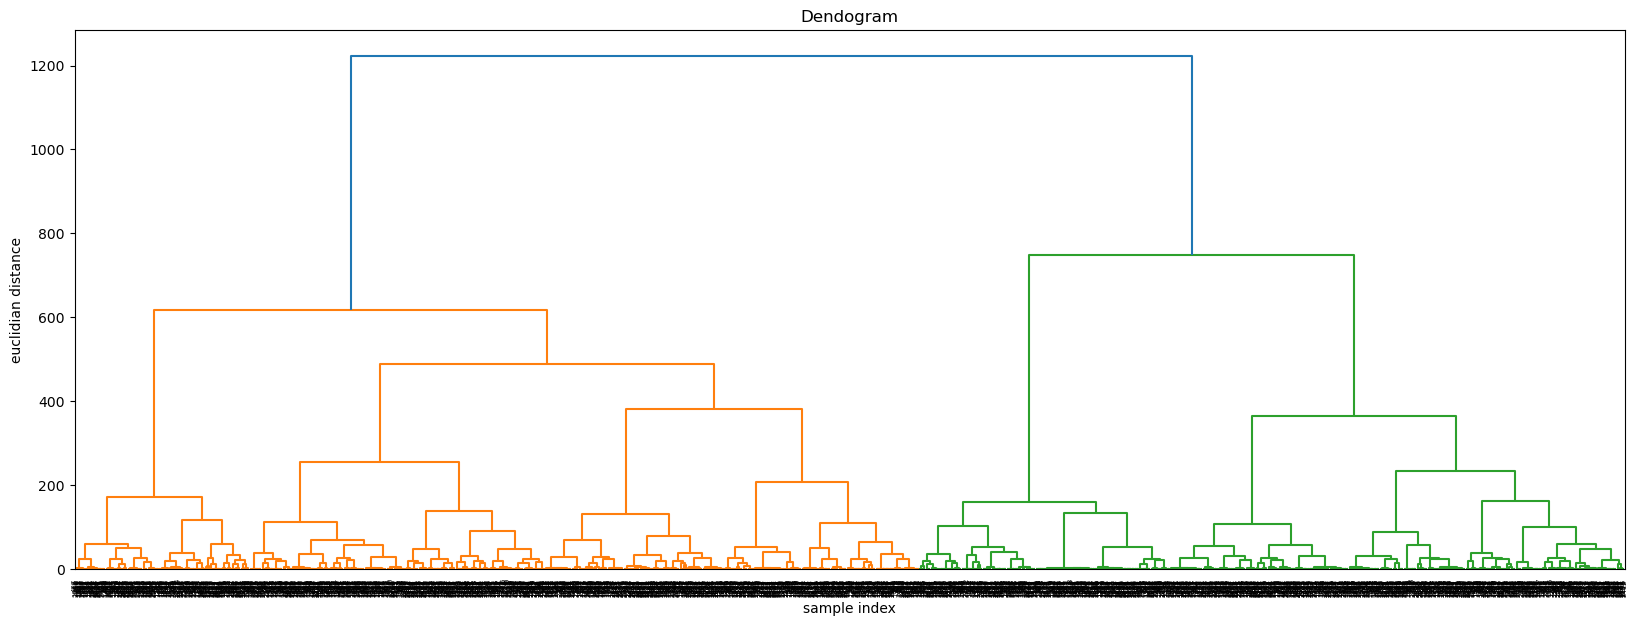

In [42]:
### plotting the dendogram
plot_dendo(df_non_scaled_test)

0.37589381479133355


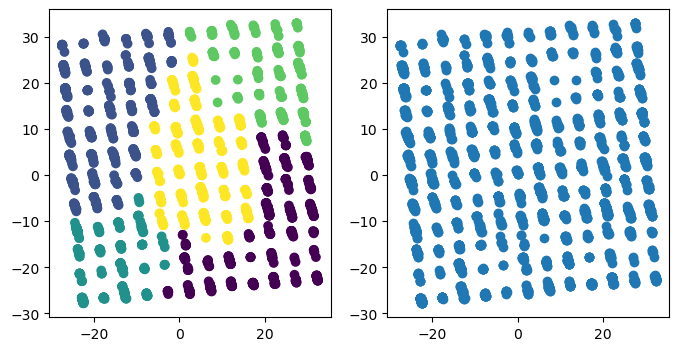

In [43]:
### taking n_clusters = 5
hm_clusters(df_non_scaled_test, n_clusters = 5)

##### **************Price column for the scatter plot only **************

In [44]:
### loading the price data
df_price = load_data(df_non_scaled_price_path)
df_price.head()

,Price
0,3897
1,7662
2,13882
3,6218
4,13302


In [45]:
### checking the shape only
get_shape(df_price)

(10683, 1)

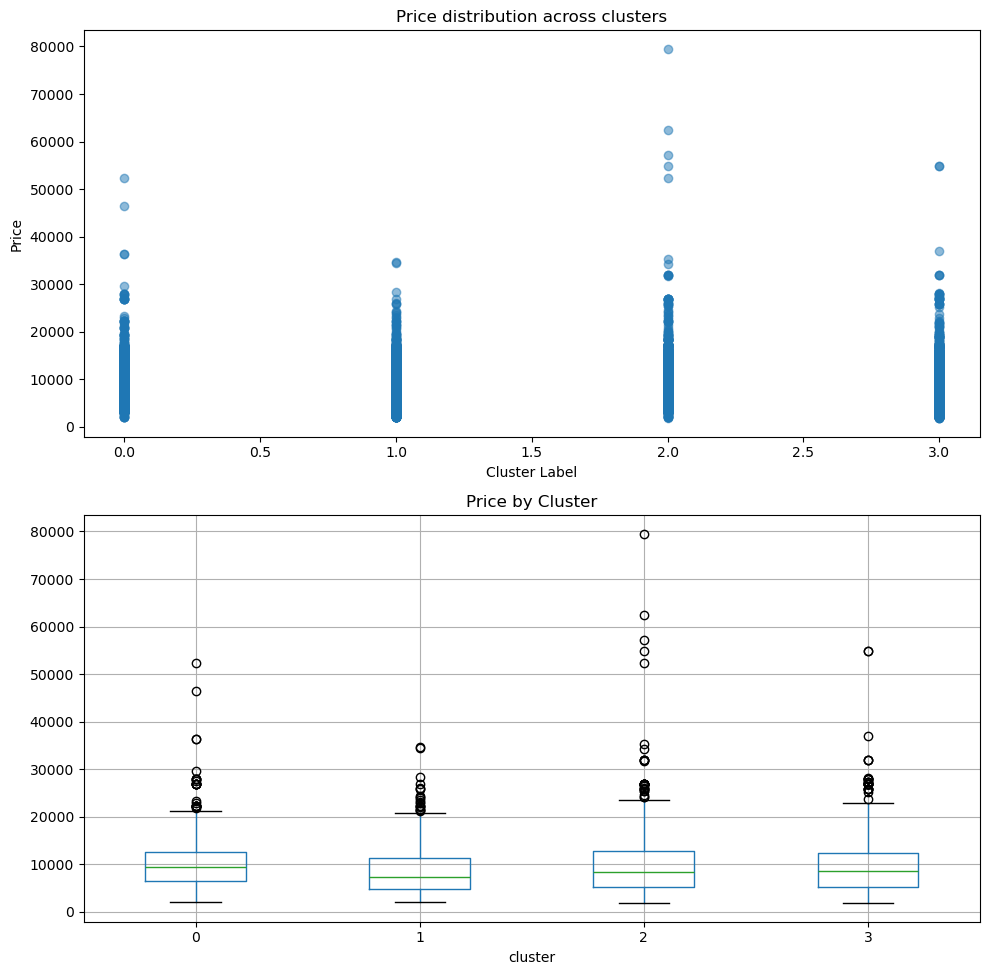

In [46]:
### plotting the scatter plot vs kmeans labels
plot_price_and_labels(df_price, labels_path = y_labels_kmeans_path)

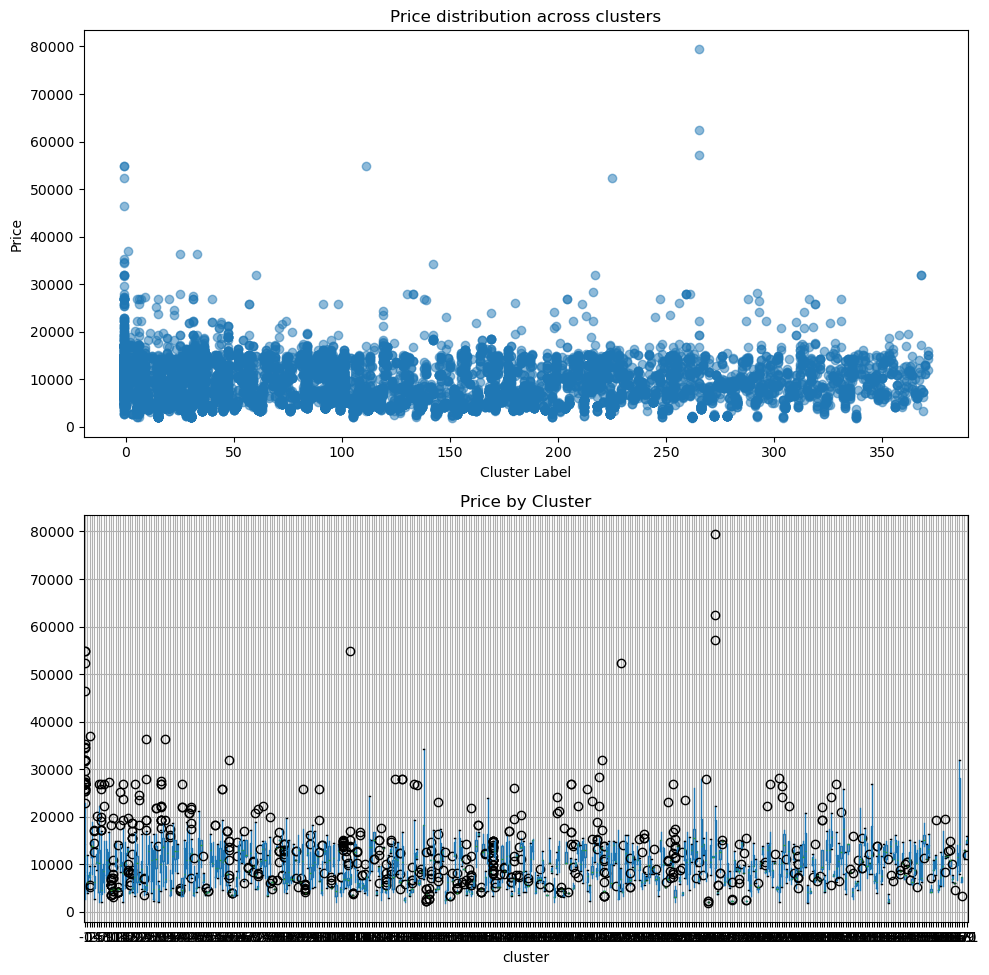

In [47]:
### plotting the scatter plot vs db labels
plot_price_and_labels(df_price, labels_path = y_labels_db_path)

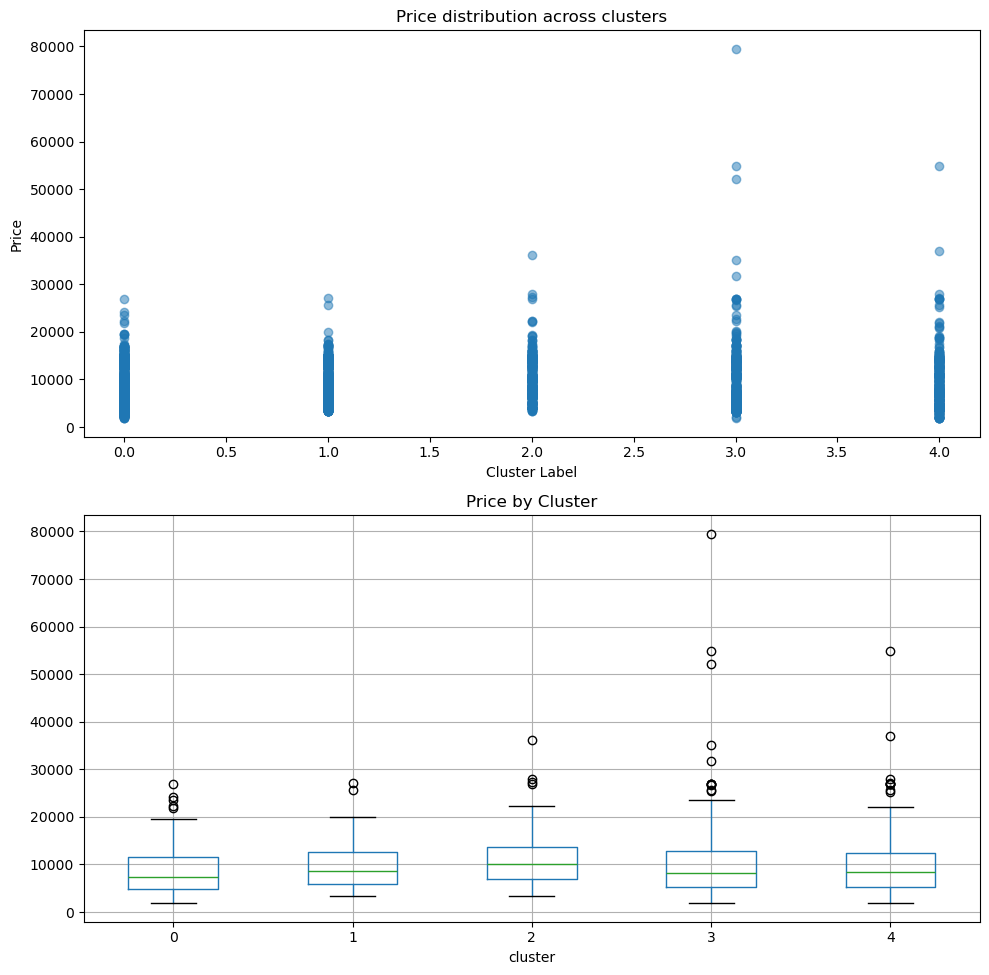

In [48]:
### plotting the scatter plot vs hm labels
### for the price vs hm cluster labels, I have to take 3000 rows just like did earlier
df_price_hm = sample_for_hm(df_price)
plot_price_and_labels(df_price_hm, labels_path = y_labels_hm_path)